# AOI Tutorial@AsiaUniversity

## Step 1: Add the data folder to Google drive
Click https://drive.google.com/open?id=15tGIHAPAatgdB8iZh_m80jCBPa-CrI_P
![alt text](https://lh3.googleusercontent.com/r-gU6GT4MshdPDeaTjSSUIQP63ExT1ufshFMFGAjDBhu00tu9jMbMwbnjfvjSO4Q6js31X6SfOmSmQxSBS02Uj2x5HAfNvI6lyWdbgIazAlB3OQfB7d3-Cte6GrbarZzHCi_XYeufeTw-eS3GGNeOdQra9mXofIwVNBS6116XCjkVOt0zUdzJsvo_7B6HuTZLenuqJW0cTsnPdjJ_NpYcc3pqLVNlgxc7pdVeNmLhpm4AQKH5bsc6CGwpiAluRMtlPw-MmVVEtLbqCysICOHfB9xyJsc-sG6NiuLxNU4B52FFA-3xA4kVK5_xFRLYQU3ZDM9N2uSFzMszNqoSuyQaLqCcEnJHuH3IbimQEoo613MJtXuGDNMBo0nyQpWMlrRcaorrcn1eOf9IfIwAdStEMNyk-yt3PbajKS1TUnOKPXrVrS2AZZECXR3I2Mu_HQb99MapFgAG5TEJBbp0Qacer5ksM70njl3exIlWR9CosN5FXFQnlW2pEVObL-i9buIt2OtEhl5SeURzNC1vPfI-q_Knb_3VEN5OIQIO8A_chs6OJgvKxqVddw6T0vcPrGitkiyudQ1kZSel7xrSzApGuNBmUzfDYVRhMIjNF3RL6O05-daZaCTbRXtY9gulVDCaoDV7TAgRpLa3n6Kvx54QnAHtj7wuowiv9_lreRRwy9qfzTzip0MVKE=w736-h172-no)

## Step 2: Mount the AOI folder

In [26]:
#Step 2a: Mount the AOI folder
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [29]:
root_dir = "drive/My Drive/aidea-aoi/"
!ls "drive/My Drive/aidea-aoi/data/"

test_images  train_images


## Step 3: View the AOI images

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

In [11]:
img = Image.open(root_dir+"data/train_images/train_01677_299.png")
print(img.size)

(299, 299)


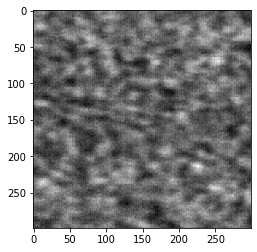

In [12]:
plt.imshow(img,cmap='gray')
plt.show()

(224, 224)


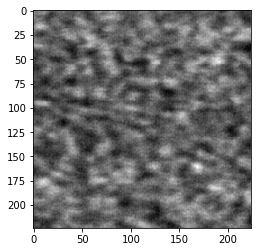

In [14]:
img2=img.resize( (224, 224), Image.BILINEAR )
print (img2.size)
plt.imshow(img2,cmap='gray')
plt.show()

## Step 4: Resize the train/test images by PIL

In [0]:
#Resize the train images-(1) PIL
from PIL import Image
maxTrainNum = 2528
for i in range(0,maxTrainNum):
    imgname="train_{0:0>5d}.png".format(i)
    imgname2 = "train_{0:0>5d}_224.png".format(i)
    img = Image.open(root_dir+"data/train_images" +'/'+ imgname)
    img2 = img.resize((224,224), Image.BILINEAR)
    img2.save("/tmp/"+ imgname2 )

In [0]:
#Resize the test images-(1) PIL
maxTestNum = 10142
for i in range(0,maxTrainNum):
    imgname="test_{0:0>5d}.png".format(i)
    imgname2 = "test_{0:0>5d}_224.png".format(i)
    img = Image.open(root_dir+"data/test_images" +'/'+ imgname)
    img2 = img.resize((224,224), Image.BILINEAR)
    img2.save("/tmp/"+ imgname2 )

## Step 5: Read images and labels

In [30]:
import pandas as pd
#labes of train dataset
df = pd.read_csv("train.csv")
print(df.shape)
train_labels = df.iloc[:,1].values
print(train_labels)

(2528, 2)
[0 1 1 ... 3 0 5]


## Step 6: Plot the distribution of AOI lables

In [32]:
labels, counts = np.unique(train_labels, return_counts=True)
print(labels, counts)

[0 1 2 3 4 5] [674 492 100 378 240 644]


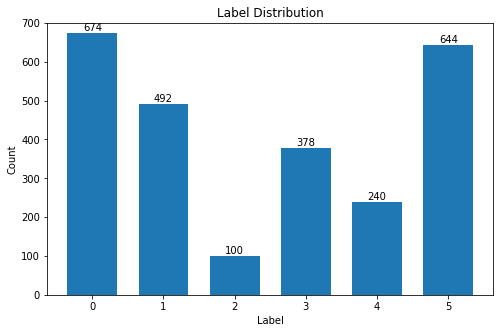

In [34]:
fig = plt.figure(figsize=(8, 5))
plt.bar(labels, counts, width=0.7, align='center')
plt.title("Label Distribution")
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(labels)
plt.ylim(0, 700)

for a, b in zip(labels, counts):
    plt.text(a, b, '%d' % b, ha='center', va='bottom', fontsize=10)
plt.show()

In [0]:
!ls "drive/My Drive/aidea-aoi/data/train_images/"

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
#Images of train dataset
maxTrainNum = 2528
#Assign a list for storing image data
img_data_list=[]
for i in range(0,maxTrainNum):
    imgname=root_dir+"data/train_images/train_{0:0>5d}_224.png".format(i)#first image as train_00000_224.png
    img = image.load_img(imgname)
    x=image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x, mode='caffe')
    img_data_list.append(x)

## Step 7: Reshape train dataset to fit model
Convert image to array

In [0]:
img_data = np.array(img_data_list)
print (img_data.shape)  #(2528, 1, 224, 224, 3)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)  #(1, 2528, 224, 224, 3)
img_data=img_data[0]
print (img_data.shape)  #(2528, 224, 224, 3)

## Step 8: Load onr of ImageNet Models:VGG-19, ResNet50, Xception, InceptonV3

In [0]:
import os
from tensorflow.python.keras import utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [0]:
#Use the VGG19 model 
###  CODE HERE ###  (≈ 1 lines)
model = VGG19(input_tensor=image_input, include_top=True, weights='imagenet')
#Summary of the customize VGG16 model
###  CODE HERE ###  (≈ 1 lines)
model.summary()

## Step 9: Setting parameters of the customized model


In [0]:
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

#Set the model's loss function, optimizer, and metrics
###  CODE HERE ###  (≈ 1 lines)
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

## Step 10: Train the customized model

In [0]:
X_train= img_data
# one-hot encoding
y_train = utils.np_utils.to_categorical(train_labels, num_classes)

In [0]:
import datetime
starttime = datetime.datetime.now()
#The parameters for the training model
###  CODE HERE ###  (≈ 1 lines)
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)
endtime = datetime.datetime.now()
print('Training time: %s' % (endtime - starttime).seconds)

## Step 11: Save the customized model

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
custom_vgg_model.save("myVgg19-010epochs.h5")

## Step 12: Check erroneous results

## Step 13: Load one of saved models

In [0]:
model = tf.keras.models.load_model('myVgg19-010epochs.h5')
model.summary()

## Step 14: Load test images

In [0]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
maxTestNum = 10142
#Images of train dataset
#設定一個list
img_data_list=[]
for i in range(0,maxTestNum):
    imgname="test_images/test_{0:0>5d}_224.png".format(i)
    img = image.load_img(imgname)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_data_list.append(x)

## Step 15: Reshape test dataset to fit model

In [0]:
img_data = np.array(img_data_list)
print (img_data.shape)  #(600, 1, 224, 224, 3)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)  #(1, 600, 224, 224, 3)
img_data=img_data[0]
print (img_data.shape)  #(600, 224, 224, 3)

## Step 16: Output the result of predictions

In [0]:
X_test = img_data
prediction = model.predict(X_test, batch_size=10)
predict = np.argmax(prediction,axis=1)
print(predict)

In [0]:
df = pd.read_csv('test.csv')
print(df.shape)

In [0]:
df['Label'] = predict
df.to_csv("submission-20191216.csv", index=False)